### Introduction

Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.


Attributes

People

ID: Customer's unique identifier

Year_Birth: Customer's birth year

Education: Customer's education level

Marital_Status: Customer's marital status

Income: Customer's yearly household income

Kidhome: Number of children in customer's household

Teenhome: Number of teenagers in customer's household

Dt_Customer: Date of customer's enrollment with the company

Recency: Number of days since customer's last purchase

Complain: 1 if the customer complained in the last 2 years, 0 otherwise


Products

MntWines: Amount spent on wine in last 2 years

MntFruits: Amount spent on fruits in last 2 years

MntMeatProducts: Amount spent on meat in last 2 years

MntFishProducts: Amount spent on fish in last 2 years

MntSweetProducts: Amount spent on sweets in last 2 years

MntGoldProds: Amount spent on gold in last 2 years


Promotion

NumDealsPurchases: Number of purchases made with a discount

AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise

AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise

AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise

AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise

AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise

Response: 1 if customer accepted the offer in the last campaign, 0 otherwise


Place

NumWebPurchases: Number of purchases made through the company’s website

NumCatalogPurchases: Number of purchases made using a catalogue

NumStorePurchases: Number of purchases made directly in stores

NumWebVisitsMonth: Number of visits to company’s website in the last month


Target

Need to perform clustering to summarize customer segments.

### Loading libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import DBSCAN, KMeans
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [2]:
from datetime import datetime

### Loading dataset

In [3]:
data = pd.read_csv("/content/drive/MyDrive/DS Course Uploads/Datasets/marketing_campaign.csv", sep="\t")

In [4]:
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [5]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

### Summarizing data

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [7]:
print(data.Z_CostContact.value_counts())
print(data.Z_Revenue.value_counts())
print(data.Kidhome.value_counts())
print(data.Teenhome.value_counts())
print(data.Complain.value_counts())

Z_CostContact
3    2240
Name: count, dtype: int64
Z_Revenue
11    2240
Name: count, dtype: int64
Kidhome
0    1293
1     899
2      48
Name: count, dtype: int64
Teenhome
0    1158
1    1030
2      52
Name: count, dtype: int64
Complain
0    2219
1      21
Name: count, dtype: int64


### Performing EDA

In [8]:
data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [9]:
df = data.copy()

In [10]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [11]:
# df['Spends'] = df.MntWines + df.MntFruits + df.MntMeatProducts + df.MntFishProducts + df.MntSweetProducts + df.MntGoldProds
# df['AccCampaigns'] = df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']].sum(axis=1)
# df['Children'] = df.Kidhome + df.Teenhome
# df.drop(['ID','Marital_Status','Z_CostContact','Z_Revenue','AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response','Kidhome','Teenhome','Education'], axis=1, inplace=True)
df.drop(['ID','Year_Birth','Education','Dt_Customer','Z_CostContact','Z_Revenue'], axis=1, inplace=True)
df.drop(['Marital_Status'], axis=1, inplace=True)

In [12]:
df.drop(index=[2233], inplace=True)

In [13]:
df.drop(index=[192,239,339], inplace=True)

In [14]:
data.duplicated().any()

False

In [15]:
df

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,58138.0,0,0,58,635,88,546,172,88,88,...,10,4,7,0,0,0,0,0,0,1
1,46344.0,1,1,38,11,1,6,2,1,6,...,1,2,5,0,0,0,0,0,0,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,2,10,4,0,0,0,0,0,0,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,0,4,6,0,0,0,0,0,0,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,61223.0,0,1,46,709,43,182,42,118,247,...,3,4,5,0,0,0,0,0,0,0
2236,64014.0,2,1,56,406,0,30,0,0,8,...,2,5,7,0,0,0,1,0,0,0
2237,56981.0,0,0,91,908,48,217,32,12,24,...,3,13,6,0,1,0,0,0,0,0
2238,69245.0,0,1,8,428,30,214,80,30,61,...,5,10,3,0,0,0,0,0,0,0


In [17]:
# convert dt_cutomer to no of years till date, and year of birth to age
# df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')
# df['Years_Customer'] = (datetime.now() - df['Dt_Customer']).dt.days / 365.25
# df['Age'] = datetime.now().year - df['Year_Birth']

In [16]:
df

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,58138.0,0,0,58,635,88,546,172,88,88,...,10,4,7,0,0,0,0,0,0,1
1,46344.0,1,1,38,11,1,6,2,1,6,...,1,2,5,0,0,0,0,0,0,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,2,10,4,0,0,0,0,0,0,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,0,4,6,0,0,0,0,0,0,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,61223.0,0,1,46,709,43,182,42,118,247,...,3,4,5,0,0,0,0,0,0,0
2236,64014.0,2,1,56,406,0,30,0,0,8,...,2,5,7,0,0,0,1,0,0,0
2237,56981.0,0,0,91,908,48,217,32,12,24,...,3,13,6,0,1,0,0,0,0,0
2238,69245.0,0,1,8,428,30,214,80,30,61,...,5,10,3,0,0,0,0,0,0,0


In [19]:
# df.drop(['Year_Birth','Dt_Customer'], axis=1, inplace=True)

In [17]:
df.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,58138.0,0,0,58,635,88,546,172,88,88,...,10,4,7,0,0,0,0,0,0,1
1,46344.0,1,1,38,11,1,6,2,1,6,...,1,2,5,0,0,0,0,0,0,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,2,10,4,0,0,0,0,0,0,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,0,4,6,0,0,0,0,0,0,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,3,6,5,0,0,0,0,0,0,0


In [18]:
df['Income'].fillna(df['Income'].mean(), inplace=True)

In [19]:
df.isnull().sum()

Income                 0
Kidhome                0
Teenhome               0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Response               0
dtype: int64

### Standardizing data

In [20]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
scaled_data

array([[ 0.2886582 , -0.82493893, -0.93061534, ..., -0.11661593,
        -0.09500143,  2.38633836],
       [-0.26229348,  1.03262748,  0.90597415, ..., -0.11661593,
        -0.09500143, -0.41905206],
       [ 0.91813708, -0.82493893, -0.93061534, ..., -0.11661593,
        -0.09500143, -0.41905206],
       ...,
       [ 0.23460944, -0.82493893, -0.93061534, ..., -0.11661593,
        -0.09500143, -0.41905206],
       [ 0.80751697, -0.82493893,  0.90597415, ..., -0.11661593,
        -0.09500143, -0.41905206],
       [ 0.04251911,  1.03262748,  0.90597415, ..., -0.11661593,
        -0.09500143,  2.38633836]])

### Modelling

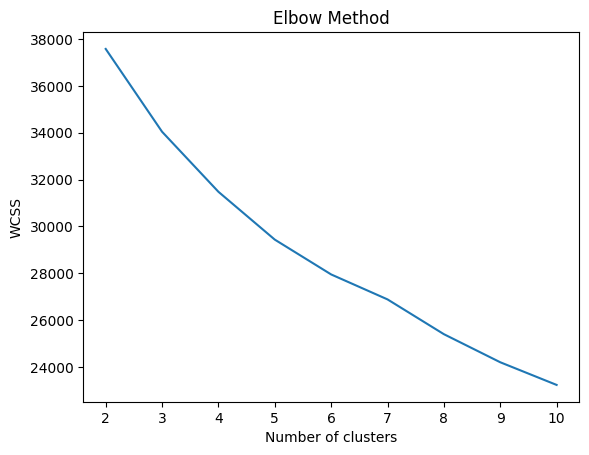

In [21]:
wcss = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i,random_state=10, n_init=10)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

plt.plot(range(2, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [23]:
model_k = KMeans(n_clusters=3,random_state=10, n_init=10)

In [24]:
clusters_new = model_k.fit(scaled_data)
clusters_new.labels_

array([1, 0, 2, ..., 2, 2, 0], dtype=int32)

In [25]:
set(list(clusters_new.labels_))

{0, 1, 2}

In [26]:
df.shape

(2236, 22)

In [27]:
df['cluster'] = clusters_new.labels_

In [28]:
print(df.groupby("cluster").mean())
print(df.groupby("cluster").max())
print(df.groupby("cluster").min())

               Income   Kidhome  Teenhome    Recency    MntWines  MntFruits  \
cluster                                                                       
0        35206.354244  0.796209  0.453081  49.324171   44.136493   4.920379   
1        76742.707089  0.035055  0.142066  49.684502  618.197417  68.994465   
2        58595.695594  0.209703  0.904538  48.291080  466.982786  25.300469   

         MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
cluster                                                                     
0              23.793365         7.275829          4.968720     15.642654   
1             474.070111       100.769373         70.778598     77.335793   
2             142.921753        33.862285         26.522692     62.483568   

         ...  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  \
cluster  ...                                                              
0        ...             0.566825           3.236967           6.475

In [29]:
df.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,cluster
count,2236.000000,2236.000000,2236.000000,2236.000000,2236.00000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,...,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000
mean,51958.810579,0.444097,0.506708,49.116279,304.12746,26.275939,166.983453,37.536225,27.080501,43.983005,...,5.795617,5.318873,0.072898,0.074687,0.072451,0.064401,0.013417,0.008945,0.149374,0.813953
std,21411.384172,0.538459,0.544609,28.957284,336.59181,39.724007,225.689645,54.648562,41.299504,52.061568,...,3.251129,2.426886,0.260027,0.262944,0.259291,0.245520,0.115077,0.094173,0.356536,0.850478
min,1730.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35502.500000,0.000000,0.000000,24.000000,24.00000,1.000000,16.000000,3.000000,1.000000,9.000000,...,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,51684.000000,0.000000,0.000000,49.000000,174.00000,8.000000,67.000000,12.000000,8.000000,24.000000,...,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,68275.750000,1.000000,1.000000,74.000000,504.25000,33.000000,232.000000,50.000000,33.000000,56.000000,...,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,162397.000000,2.000000,2.000000,99.000000,1493.00000,199.000000,1725.000000,259.000000,263.000000,362.000000,...,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000


In [30]:
df.corr()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,cluster
Income,1.000000,-0.510323,0.034356,0.007919,0.685991,0.504877,0.684173,0.518409,0.518150,0.383578,...,0.627988,-0.646413,-0.015146,0.217715,0.394276,0.325277,0.104029,-0.027899,0.161034,0.538459
Kidhome,-0.510323,1.000000,-0.035339,0.007964,-0.496166,-0.372442,-0.436901,-0.387404,-0.370486,-0.349462,...,-0.500192,0.447626,0.014739,-0.161686,-0.204918,-0.172435,-0.081760,0.036336,-0.080005,-0.509281
Teenhome,0.034356,-0.035339,1.000000,0.016746,0.005047,-0.176117,-0.261171,-0.204177,-0.162527,-0.020447,...,0.050177,0.134636,-0.042949,0.038680,-0.190383,-0.140426,-0.015715,0.007553,-0.154941,0.300222
Recency,0.007919,0.007964,0.016746,1.000000,0.016321,-0.003717,0.023446,0.001314,0.022796,0.017168,...,0.000771,-0.021850,-0.033095,0.018779,0.000844,-0.019367,-0.001811,0.005361,-0.198781,-0.013565
MntWines,0.685991,-0.496166,0.005047,0.016321,1.000000,0.388472,0.561886,0.398956,0.385845,0.386234,...,0.642313,-0.320287,0.062103,0.373491,0.471949,0.354328,0.206031,-0.035974,0.247280,0.591365
MntFruits,0.504877,-0.372442,-0.176117,-0.003717,0.388472,1.000000,0.542030,0.594415,0.567030,0.389999,...,0.463136,-0.417405,0.014945,0.010363,0.211996,0.195351,-0.009717,-0.002813,0.125854,0.290125
MntMeatProducts,0.684173,-0.436901,-0.261171,0.023446,0.561886,0.542030,1.000000,0.567813,0.523329,0.348727,...,0.479983,-0.539183,0.018250,0.102981,0.372173,0.310053,0.043060,-0.020750,0.236548,0.316298
MntFishProducts,0.518409,-0.387404,-0.204177,0.001314,0.398956,0.594415,0.567813,1.000000,0.579490,0.422018,...,0.459997,-0.445729,0.000302,0.016797,0.198112,0.260866,0.002555,-0.018842,0.111325,0.284732
MntSweetProducts,0.518150,-0.370486,-0.162527,0.022796,0.385845,0.567030,0.523329,0.579490,1.000000,0.369084,...,0.448673,-0.423215,0.001412,0.028534,0.258797,0.241826,0.009940,-0.020432,0.117263,0.292620
MntGoldProds,0.383578,-0.349462,-0.020447,0.017168,0.386234,0.389999,0.348727,0.422018,0.369084,1.000000,...,0.383124,-0.249041,0.123670,0.022547,0.176323,0.167090,0.050224,-0.029902,0.140595,0.421596


### Visualization

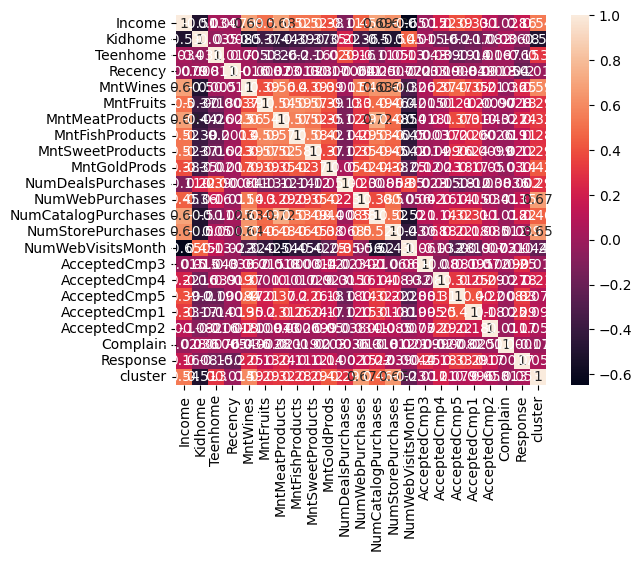

In [31]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, square=True)
plt.show()

In [34]:
sns.pairplot(df, hue="cluster", palette="Set1", corner=True)

Output hidden; open in https://colab.research.google.com to view.

<Axes: xlabel='MntMeatProducts', ylabel='Recency'>

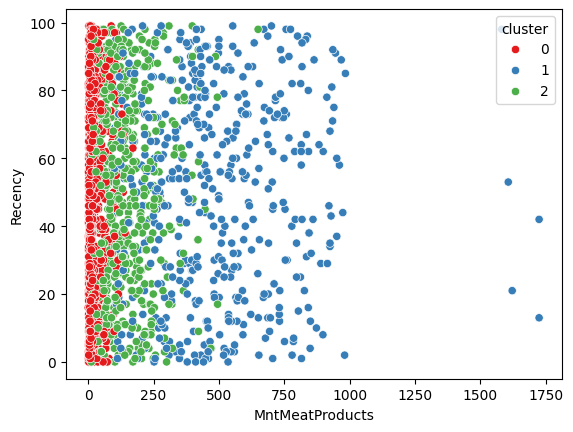

In [36]:
sns.scatterplot(df, x="MntMeatProducts", y="Recency", hue="cluster", palette="Set1")

<Axes: xlabel='MntMeatProducts'>

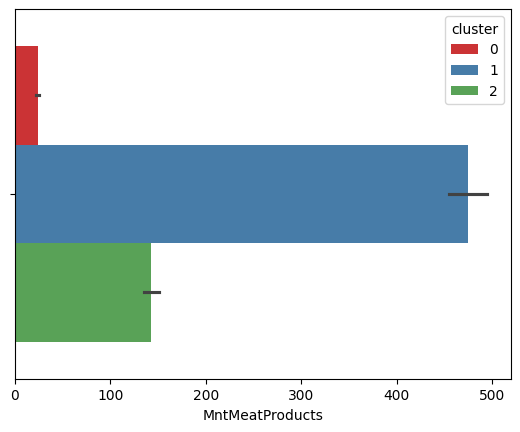

In [37]:
sns.barplot(df, x="MntMeatProducts", hue="cluster", palette="Set1")

<Axes: xlabel='Income', ylabel='MntMeatProducts'>

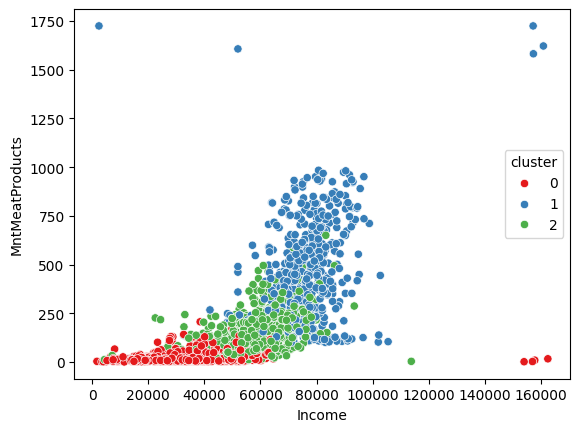

In [38]:
sns.scatterplot(df, x="Income", y="MntMeatProducts", hue="cluster", palette="Set1")

<Axes: xlabel='Income'>

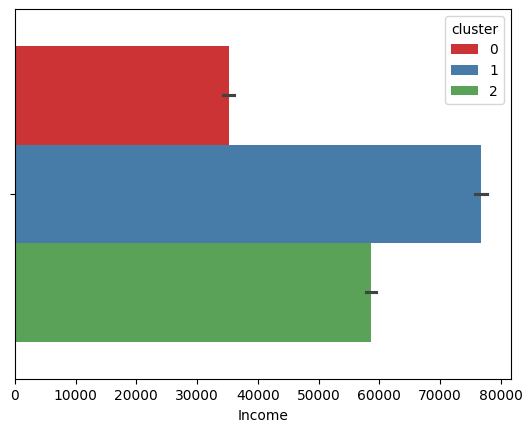

In [39]:
sns.barplot(df, x="Income", hue="cluster", palette="Set1")

<Axes: xlabel='Kidhome', ylabel='MntMeatProducts'>

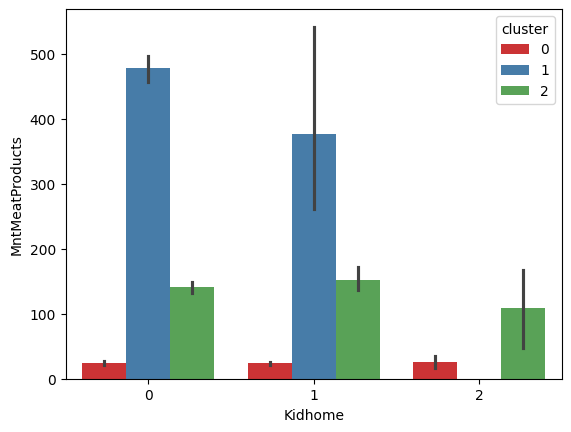

In [40]:
sns.barplot(df, x="Kidhome", y="MntMeatProducts", hue="cluster", palette="Set1")

<Axes: xlabel='Complain', ylabel='MntMeatProducts'>

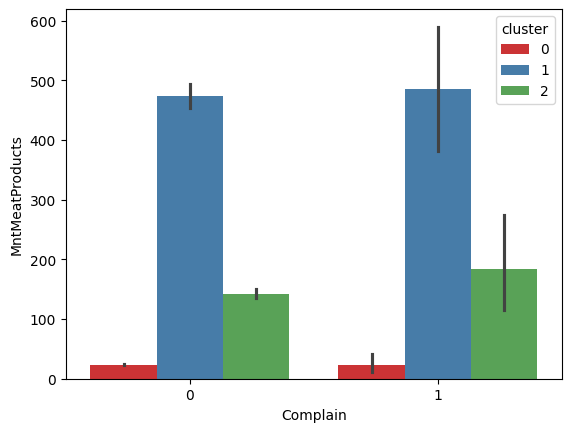

In [41]:
sns.barplot(df, x="Complain", y="MntMeatProducts", hue="cluster", palette="Set1")


In [42]:
# df_new = df.copy()
# age_bins = [10, 20, 30, 40, 50, 60, 70, 80, 90]  # Define age bins
# age_labels = ['0-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89']  # Define age labels

# # Create a new column for age ranges
# df_new['Age_Range'] = pd.cut(df_new['Age'], bins=age_bins, labels=age_labels, right=False)
# sns.barplot(df_new, x="Age_Range", y="MntMeatProducts", hue="cluster", palette="Set1")

KeyError: 'Age'

In [43]:
df.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'cluster'],
      dtype='object')

<Axes: xlabel='NumDealsPurchases', ylabel='MntMeatProducts'>

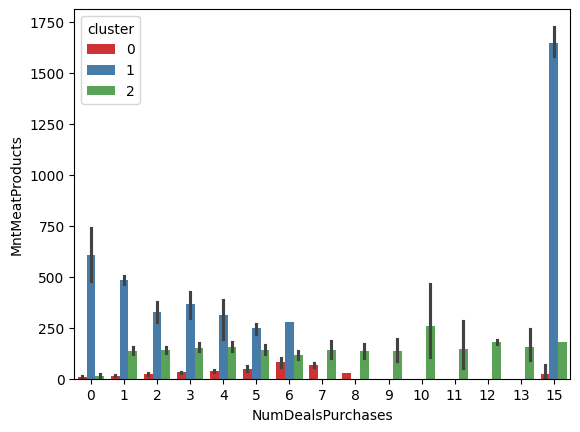

In [44]:
sns.barplot(df, x="NumDealsPurchases", y="MntMeatProducts", hue="cluster", palette="Set1")

<Axes: xlabel='NumDealsPurchases', ylabel='MntMeatProducts'>

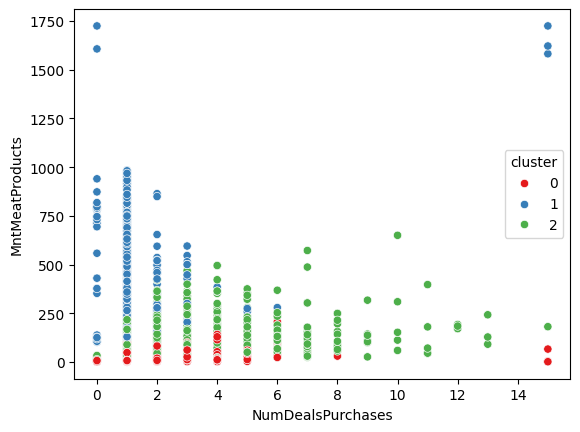

In [45]:
sns.scatterplot(df, x="NumDealsPurchases", y="MntMeatProducts", hue="cluster", palette="Set1")

<Axes: xlabel='NumWebPurchases', ylabel='MntMeatProducts'>

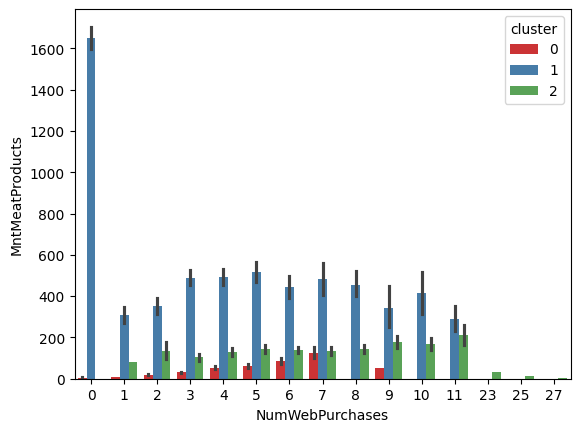

In [46]:
sns.barplot(df, x="NumWebPurchases", y="MntMeatProducts", hue="cluster", palette="Set1")

<Axes: xlabel='NumWebPurchases', ylabel='Income'>

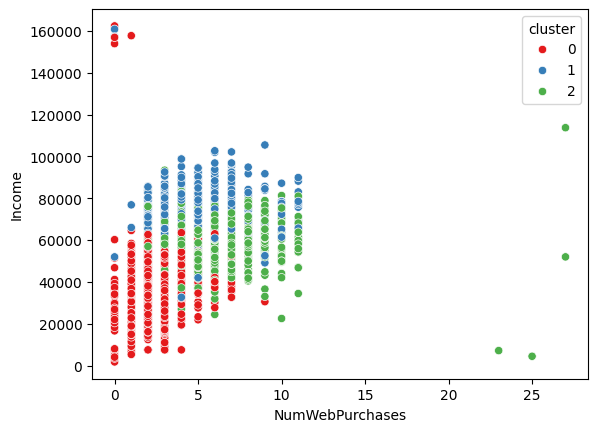

In [47]:
sns.scatterplot(df, x="NumWebPurchases", y="Income", hue="cluster", palette="Set1")

<Axes: xlabel='NumCatalogPurchases', ylabel='MntMeatProducts'>

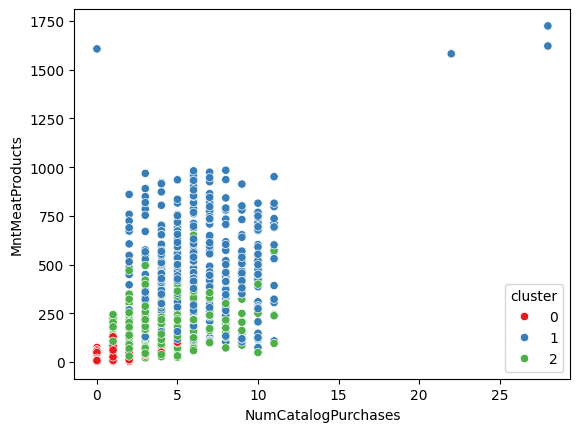

In [48]:
sns.scatterplot(df, x="NumCatalogPurchases", y="MntMeatProducts", hue="cluster", palette="Set1")

<Axes: xlabel='NumCatalogPurchases', ylabel='MntMeatProducts'>

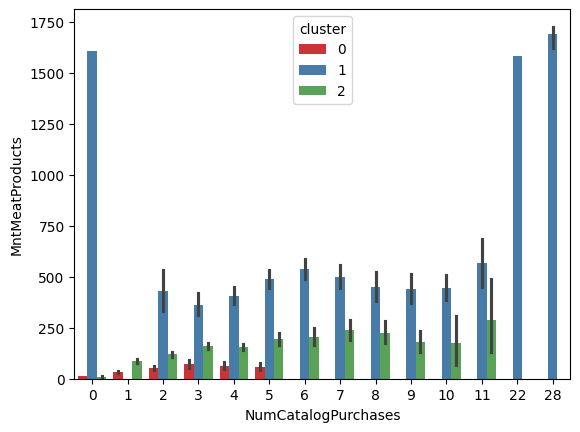

In [49]:
sns.barplot(df, x="NumCatalogPurchases", y="MntMeatProducts", hue="cluster", palette="Set1")

<Axes: xlabel='NumStorePurchases', ylabel='MntMeatProducts'>

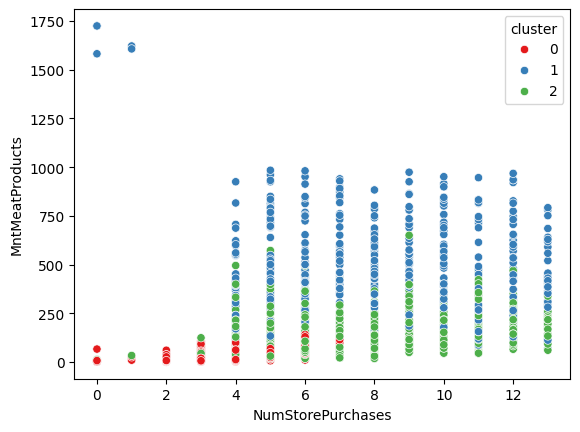

In [51]:
sns.scatterplot(df, x="NumStorePurchases", y="MntMeatProducts", hue="cluster", palette="Set1")

<Axes: xlabel='NumStorePurchases', ylabel='MntMeatProducts'>

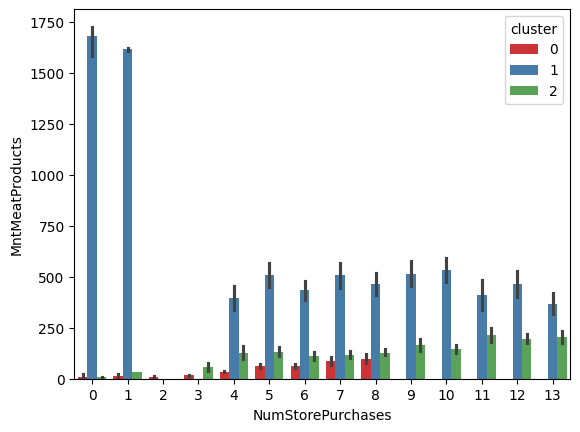

In [50]:
sns.barplot(df, x="NumStorePurchases", y="MntMeatProducts", hue="cluster", palette="Set1")

<Axes: xlabel='NumWebVisitsMonth', ylabel='MntMeatProducts'>

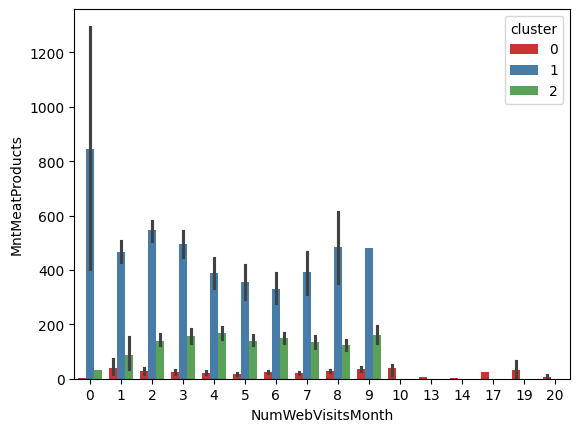

In [52]:
sns.barplot(df, x="NumWebVisitsMonth", y="MntMeatProducts", hue="cluster", palette="Set1")

<Axes: xlabel='NumWebVisitsMonth', ylabel='MntMeatProducts'>

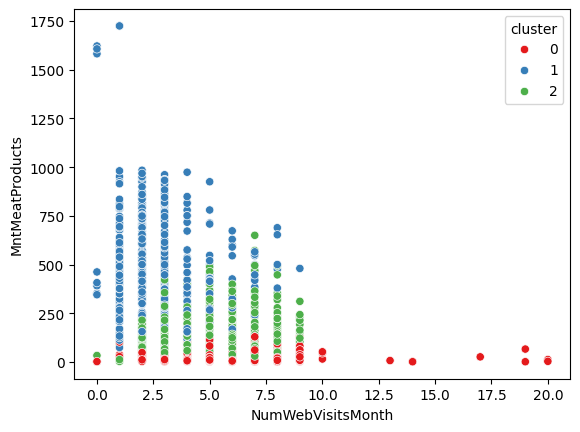

In [53]:
sns.scatterplot(df, x="NumWebVisitsMonth", y="MntMeatProducts", hue="cluster", palette="Set1")

In [54]:
df.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'cluster'],
      dtype='object')

<Axes: xlabel='Kidhome', ylabel='MntMeatProducts'>

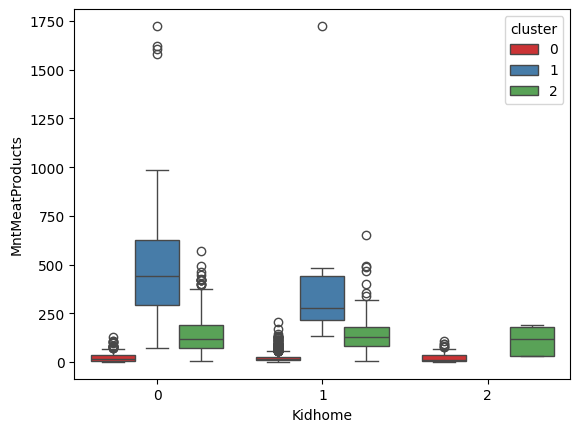

In [55]:
sns.boxplot(df, x="Kidhome", y="MntMeatProducts", hue="cluster", palette="Set1")

<Axes: xlabel='Response', ylabel='MntMeatProducts'>

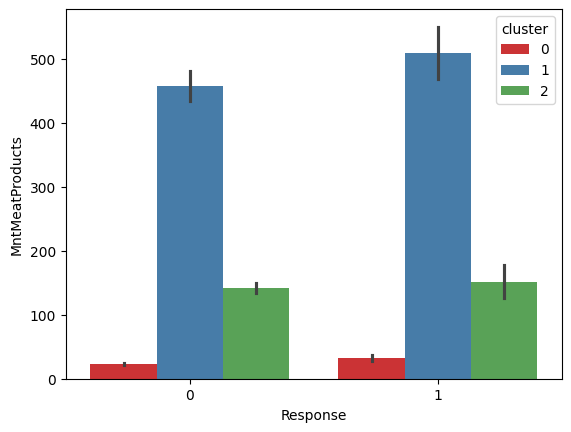

In [56]:
sns.barplot(df, x="Response", y="MntMeatProducts", hue="cluster", palette="Set1")

In [57]:
# sns.barplot(df, x="Response", y="Age", hue="cluster", palette="Set1")

<Axes: xlabel='Kidhome', ylabel='Response'>

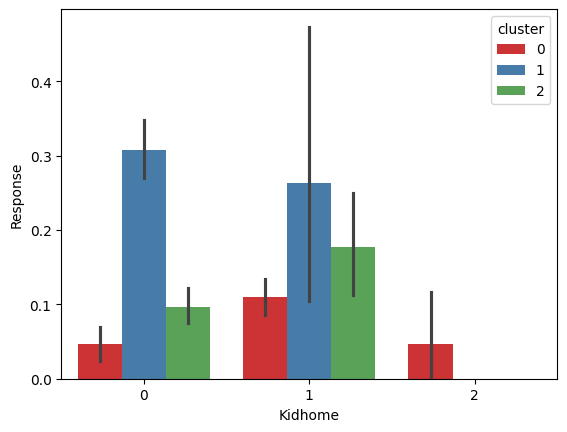

In [58]:
sns.barplot(df, x="Kidhome", y="Response", hue="cluster", palette="Set1")

In [ ]:
# plt.scatter(df['NumWebPurchases'], df['Income'], color='blue', label='Income')
# plt.scatter(df['NumWebPurchases'], df['Years_Customer'], color='red', label='Spends')
# plt.xlabel('NumWebPurchases')
# plt.ylabel('Values')
# plt.title('Scatter Plot with Two Features')
# plt.legend()
# plt.show()

### DBSCAN (not optimal)

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np

best_eps = None
best_min_samples = None
best_score = -1

# Define ranges for eps and min_samples
eps_range = np.arange(1, 15, 0.5)
# min_samples_range = range(20, 30)

# Grid search over parameters
for eps in eps_range:
    # for min_samples in min_samples_range:
        model = DBSCAN(eps=eps, min_samples=22)
        labels = model.fit_predict(scaled_data_dbscan)

        # Skip if the algorithm fails to create clusters
        if len(set(labels)) <= 3:
            continue

        score = silhouette_score(scaled_data_dbscan, labels)

        if score > best_score:# and score > 0.5:
            best_eps = eps
            best_min_samples = 22
            best_score = score

print(f"Best eps: {best_eps}")
print(f"Best min_samples: {best_min_samples}")
print(f"Best silhouette score: {best_score}")

In [ ]:
data.head()

In [ ]:
data.info()

In [ ]:
data.drop(['ID','Year_Birth','Education','Dt_Customer','Z_CostContact','Z_Revenue'], axis=1, inplace=True)

In [ ]:
data.drop(['Marital_Status'], axis=1, inplace=True)

In [ ]:
data.info()

In [ ]:
data.Income.fillna(data.Income.mean(), inplace=True)

In [ ]:
scaled_data_dbscan = scaler.fit_transform(data)

In [ ]:
model = DBSCAN(4.0, min_samples=22)

In [ ]:
clusterd = model.fit(scaled_data_dbscan)
set(list(clusterd.labels_))

In [ ]:
data.corr()[data.corr() > 0.7]

In [ ]:
data['cluster'] = clusterd.labels_

In [ ]:
data['cluster'].value_counts()

In [ ]:
print(data.groupby('cluster').count())

Inference:

Since with DBSCAN, the number of outliers are almost 12.5%, and the corresponding silhoutte score is 0.2 which is quite less, this is not the best solution for the current dataset.

### Summary

1. DBSCAN not working for large no of rows and no optimal epsilon or min_samples value could be determnined.
2. 3 clusters are created using K means with help of elbow graph.

3. Cluster 0:
	* mid income and spends family
	* most purchases made with discount
	* more direct less catalog purchases
	* distributed across ages
	* Not affected much with campaigns

4. Cluster 1:
	* Richest - most income and spends by a good margin
	* Less discounts taken and more catalog or store purchases
	* With no children mostly
	* Hardly any website visits
	* Accept/buy with campaigns

5. Cluster 2:
	* Lowest income and spends
	* Average use of deals
	* With children
	* Not affected much with campaigns
	* Mostly buys from store but visits websites frequently probably looking for offers but don't convert to customer often